# **DADOS DE CUSTOS MÉDICOS**

## **Carregando o PyCaret 

In [ ]:
#instalar pycaret

In [1]:
from pycaret.datasets import get_data
dados = get_data('insurance') 

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


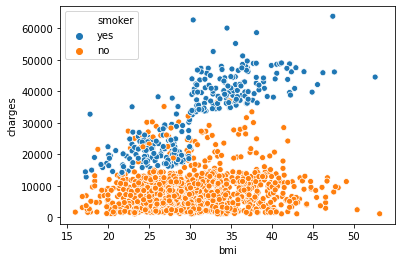

In [2]:
import seaborn as sns
sns.scatterplot(x = 'bmi', y = 'charges', hue = 'smoker', data = dados);

---

## **Objetivo Primário: construir um bom modelo para previsão dos custos médicos de uma pessoa**

In [3]:
from pycaret.regression import * 

In [4]:
?setup

In [5]:
# setup
regressao = setup(data = dados, 
                  target = 'charges', 
                  normalize = True,
                  n_jobs = 2)

,Description,Value
0,session_id,7493
1,Target,charges
2,Original Data,"(1338, 7)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(936, 14)"


In [6]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [7]:
rf = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2220.7156,14695308.0566,3833.4460,0.8962,0.3567,0.2795
1,2543.3739,17137549.3247,4139.7523,0.8553,0.4180,0.3592
2,2823.7286,30145832.6416,5490.5221,0.7867,0.3519,0.2198
3,2453.2187,21608653.8091,4648.5109,0.8879,0.4997,0.3230
4,3088.5150,34576316.8293,5880.1630,0.7941,0.4751,0.3066
5,2892.5012,27785962.1766,5271.2392,0.8343,0.4553,0.2785
6,2658.6906,19452168.8461,4410.4613,0.8829,0.4422,0.3114
7,3361.2919,39390746.5513,6276.2048,0.7145,0.5020,0.2176
8,2066.5228,15247919.9892,3904.8585,0.9158,0.4682,0.3337
9,2862.6312,24310283.5841,4930.5460,0.7960,0.4683,0.3657


In [8]:
rf = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2220.7156,14695308.0566,3833.4460,0.8962,0.3567,0.2795
1,2543.3739,17137549.3247,4139.7523,0.8553,0.4180,0.3592
2,2823.7286,30145832.6416,5490.5221,0.7867,0.3519,0.2198
3,2453.2187,21608653.8091,4648.5109,0.8879,0.4997,0.3230
4,3088.5150,34576316.8293,5880.1630,0.7941,0.4751,0.3066
5,2892.5012,27785962.1766,5271.2392,0.8343,0.4553,0.2785
6,2658.6906,19452168.8461,4410.4613,0.8829,0.4422,0.3114
7,3361.2919,39390746.5513,6276.2048,0.7145,0.5020,0.2176
8,2066.5228,15247919.9892,3904.8585,0.9158,0.4682,0.3337
9,2862.6312,24310283.5841,4930.5460,0.7960,0.4683,0.3657


In [9]:
rf_tunado = tune_model(rf, optimize = 'RMSLE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1171.4973,8088659.3900,2844.0569,0.9429,0.2023,0.0987
1,1286.9636,9430151.4058,3070.8552,0.9204,0.2468,0.1408
2,2360.1422,27510260.0260,5245.0224,0.8053,0.3709,0.1400
3,1883.1303,20874002.8350,4568.8076,0.8918,0.4220,0.1603
4,2434.9671,30351286.9162,5509.2002,0.8193,0.3777,0.1637
5,2196.0564,26071411.0527,5106.0171,0.8445,0.4451,0.1642
6,1848.4431,17869661.2642,4227.2522,0.8925,0.3809,0.1374
7,2910.8277,39731606.6660,6303.3013,0.7121,0.5460,0.1695
8,1421.2808,13732847.8885,3705.7857,0.9241,0.3944,0.1337
9,1782.0708,18433043.3088,4293.3720,0.8453,0.3290,0.1343


In [10]:
# Comparando os modelos implementados, ordenando pelo RMSLE
melhores = compare_models(sort = 'RMSLE', n_select = 5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2491.9127,19998287.3938,4421.5838,0.8562,0.4087,0.2782,0.0890
rf,Random Forest Regressor,2519.5037,21082818.3844,4536.3415,0.8471,0.4262,0.2830,0.3270
catboost,CatBoost Regressor,2608.2239,21723784.6511,4611.9816,0.8434,0.4386,0.2928,0.9280
huber,Huber Regressor,3778.0064,49084682.9587,6946.2735,0.6544,0.4413,0.2139,0.0680
par,Passive Aggressive Regressor,3618.9077,54437492.5368,7291.5774,0.6221,0.4523,0.1837,0.0340
et,Extra Trees Regressor,2596.2653,25022601.9994,4948.3408,0.8170,0.4643,0.3016,0.2460
lightgbm,Light Gradient Boosting Machine,2660.3161,20629484.5580,4493.4290,0.8501,0.4651,0.3184,0.0820
dt,Decision Tree Regressor,2822.0726,36734423.7193,6011.4060,0.7195,0.4850,0.2961,0.0190
xgboost,Extreme Gradient Boosting,2907.9535,25357200.1000,4986.2271,0.8146,0.5052,0.3516,0.6090
llar,Lasso Least Angle Regression,4285.0547,35494976.6854,5906.7929,0.7476,0.5585,0.4338,0.0180


In [12]:
melhores_tunados = []

for i in range(len(melhores)):
    melhores_tunados.append(tune_model(melhores[i], optimize = 'RMSLE'))

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,4151.7044,52355416.6327,7235.7043,0.6732,0.4534,0.2026
1,2669.0822,30491553.7465,5521.9158,0.6030,0.4194,0.1794
2,3096.8899,36198318.5884,6016.5039,0.6630,0.3734,0.1825
3,4449.5403,56198573.8340,7496.5708,0.6523,0.4941,0.2397
4,3121.5335,35481798.8250,5956.6600,0.7454,0.3083,0.1774
5,3610.9399,54206647.1637,7362.5164,0.6780,0.3711,0.1859
6,3834.5048,44393531.9511,6662.8471,0.6863,0.3736,0.2138
7,3894.3097,58708896.3385,7662.1731,0.6305,0.4225,0.1927
8,5308.0683,74162979.0498,8611.7930,0.6063,0.5481,0.3018
9,3481.2147,41658867.3771,6454.3681,0.6600,0.5710,0.2092


In [13]:
modelo_combinado = blend_models(melhores_tunados)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3068.8926,32542201.3553,5704.5772,0.7969,0.4068,0.2000
1,2062.7270,17212656.4767,4148.8139,0.7759,0.3765,0.1601
2,2106.6598,15120828.0603,3888.5509,0.8592,0.3133,0.1815
3,3304.4660,34477720.8621,5871.7732,0.7867,0.4357,0.2248
4,2074.3871,14531197.8959,3811.9808,0.8957,0.2511,0.1588
5,2248.7538,18168407.7036,4262.4415,0.8921,0.2538,0.1748
6,2732.8987,22046395.2193,4695.3589,0.8442,0.3194,0.1769
7,2647.7475,22269456.4567,4719.0525,0.8599,0.3519,0.1835
8,3408.3272,34604644.9165,5882.5713,0.8163,0.4386,0.2079
9,2535.5721,25141986.5600,5014.1786,0.7948,0.4570,0.1838


In [14]:
# Performance nos dados de validacao
pred = predict_model(modelo_combinado)
pred

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,2700.6942,30057049.4485,5482.4310,0.8041,0.4137,0.1781


,age,bmi,sex_female,children_0,children_1,children_2,children_3,children_4,children_5,smoker_no,region_northeast,region_northwest,region_southeast,region_southwest,charges,Label
0,1.197173,1.829046,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,11093.623047,11486.000585
1,-0.093622,-0.569757,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,6555.070312,7005.328527
2,0.480064,-1.161063,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,21677.283203,26011.301679
3,0.910329,0.612855,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,60021.398438,39198.642560
4,1.340594,-0.414150,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,12224.350586,11838.751475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,0.910329,0.161595,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,11187.656250,12388.778308
398,-0.523888,-0.297036,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,19719.695312,22610.164329
399,-0.021912,-1.021017,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,6710.191895,7167.499043
400,1.627438,0.223838,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,13555.004883,13695.808896


In [31]:
pred['Label']

0      31750.023541
1       7474.522000
2      17422.849111
3       9178.733772
4       6923.005196
           ...     
397    18044.242493
398    34178.386623
399    22047.539470
400     2859.470266
401    12296.872943
Name: Label, Length: 402, dtype: float64

In [15]:
evaluate_model(modelo_combinado)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [16]:
# Utilizando o modelo escolhido nos dados todos para gerar o modelo final
modelo_final = finalize_model(modelo_combinado)

In [17]:
predict_model(modelo_combinado)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,2700.6942,30057049.4485,5482.4310,0.8041,0.4137,0.1781


,age,bmi,sex_female,children_0,children_1,children_2,children_3,children_4,children_5,smoker_no,region_northeast,region_northwest,region_southeast,region_southwest,charges,Label
0,1.197173,1.829046,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,11093.623047,11486.000585
1,-0.093622,-0.569757,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,6555.070312,7005.328527
2,0.480064,-1.161063,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,21677.283203,26011.301679
3,0.910329,0.612855,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,60021.398438,39198.642560
4,1.340594,-0.414150,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,12224.350586,11838.751475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,0.910329,0.161595,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,11187.656250,12388.778308
398,-0.523888,-0.297036,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,19719.695312,22610.164329
399,-0.021912,-1.021017,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,6710.191895,7167.499043
400,1.627438,0.223838,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,13555.004883,13695.808896


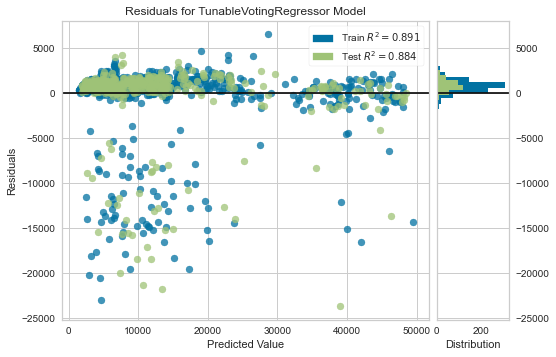

In [35]:
plot_model(modelo_final)


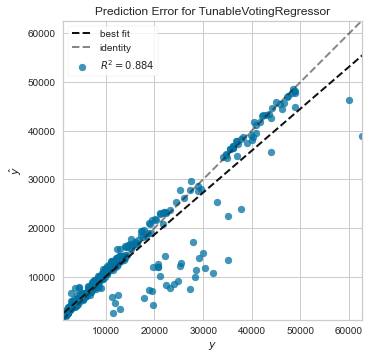

In [36]:
plot_model(modelo_final, plot = 'error')


In [18]:
# Salvando o modelo
save_model(modelo_final, 'meu-melhor-modelo-para-charges')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='charges',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy...
                                                      PassiveAggressiveRegressor(C=7.411,
                                                                                 average=False,
                                                                                 early_stopping=False,
                        

In [19]:
# Deploy Básico

def CustoSeguro(age, sex, bmi, children, smoker, region):
    dados0 = {'age': [age], 'sex': [sex], 'bmi': [bmi], 'children': [children], 'smoker': [smoker], 'region': [region]}
    dados = pd.DataFrame(dados0)

    modelo = load_model('meu-melhor-modelo-para-charges')

    pred = float(predict_model(modelo, data = dados)['Label'].round(2))
    valor = round(1.8*pred, 2)
    
    print(' ')
    print('Idade: {}'.format(age))
    print('Sexo: {}'.format(sex))
    print('IMC: {}'.format(bmi))
    print('Crianças: {}'.format(children))
    print('Fumante: {}'.format(smoker))
    print('Região: {}'.format(region))
    print(' ')
    print('Custo do Seguro: ${}'.format(pred))
    print('Valor de Venda: ${}'.format(valor))


In [20]:
CustoSeguro(age = 31, sex = 'male', bmi = 25, children = 0, smoker =  'no', region = 'southwest')

Transformation Pipeline and Model Successfully Loaded
 
Idade: 31
Sexo: male
IMC: 25
Crianças: 0
Fumante: no
Região: southwest
 
Custo do Seguro: $4006.03
Valor de Venda: $7210.85


In [23]:
CustoSeguro(45, 'female', 20, 2, 'yes', 'southwest')

Transformation Pipeline and Model Successfully Loaded
 
Idade: 45
Sexo: female
IMC: 20
Crianças: 2
Fumante: yes
Região: southwest
 
Custo do Seguro: $26003.51
Valor de Venda: $46806.32


---

## **Objetivo secundário: construir um modelo para detectar fumantes e possíveis fraudadores dessa variável.**

In [24]:
from pycaret.classification import *

In [25]:
class_setup = setup(data = dados,
                    target = 'smoker',
                    normalize = True, 
                    ignore_low_variance = True,
                    remove_multicollinearity = True, 
                    multicollinearity_threshold = 0.95,
                    n_jobs = 2)

,Description,Value
0,session_id,5022
1,Target,smoker
2,Target Type,Binary
3,Label Encoded,"no: 0, yes: 1"
4,Original Data,"(1338, 7)"
5,Missing Values,False
6,Numeric Features,3
7,Categorical Features,3
8,Ordinal Features,False
9,High Cardinality Features,False


In [26]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,pycaret.internal.tunable.TunableMLPClassifier,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [27]:
todos = compare_models(n_select = 18, turbo = False)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9658,0.9941,0.9599,0.9688,0.9663,0.8946,0.8975,1.6290
lightgbm,Light Gradient Boosting Machine,0.9636,0.9911,0.9523,0.9659,0.9642,0.8877,0.8895,0.0670
rbfsvm,SVM - Radial Kernel,0.9616,0.9865,0.9761,0.9693,0.9631,0.8881,0.8949,0.0460
xgboost,Extreme Gradient Boosting,0.9572,0.9900,0.9399,0.9599,0.9577,0.8668,0.8694,0.2340
gbc,Gradient Boosting Classifier,0.9540,0.9886,0.9359,0.9572,0.9546,0.8573,0.8604,0.1230
lr,Logistic Regression,0.9509,0.9876,0.9273,0.9541,0.9511,0.8444,0.8487,0.4640
dt,Decision Tree Classifier,0.9498,0.9163,0.9163,0.9512,0.9496,0.8382,0.8409,0.0210
rf,Random Forest Classifier,0.9487,0.9885,0.9218,0.9514,0.9488,0.8372,0.8409,0.2260
ada,Ada Boost Classifier,0.9466,0.9872,0.9186,0.9494,0.9467,0.8306,0.8345,0.1000
mlp,MLP Classifier,0.9423,0.9867,0.9096,0.9445,0.9425,0.8170,0.8197,3.0680


In [ ]:
?compare_models

In [30]:
top7_tunados = [tune_model(i) for i in todos[:7]]


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9043,0.9326,0.9204,0.9261,0.9094,0.7390,0.7548
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9574,0.9379,0.9313,0.9574,0.9574,0.8626,0.8626
3,0.9681,0.9912,0.9803,0.9726,0.9690,0.9031,0.9074
4,0.9681,0.9912,0.9803,0.9726,0.9690,0.9031,0.9074
5,0.9681,0.9901,0.9803,0.9726,0.9690,0.9031,0.9074
6,0.9462,0.9763,0.9667,0.9579,0.9486,0.8442,0.8547
7,0.9355,0.9844,0.9389,0.9447,0.9378,0.8094,0.8160
8,0.9785,0.9956,0.9867,0.9806,0.9789,0.9339,0.9359
9,0.9785,0.9685,0.9656,0.9785,0.9785,0.9311,0.9311


In [49]:
top7_tunados

[LGBMClassifier(bagging_fraction=0.8, bagging_freq=1, boosting_type='gbdt',
                class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
                importance_type='split', learning_rate=0.371, max_depth=-1,
                min_child_samples=45, min_child_weight=0.001, min_split_gain=0,
                n_estimators=260, n_jobs=2, num_leaves=10, objective=None,
                random_state=4962, reg_alpha=0.3, reg_lambda=0.15, silent=True,
                subsample=1.0, subsample_for_bin=200000, subsample_freq=0),
 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
               importance_type='gain', interaction_constraints='',
               learning_rate=0.112, max_delta_step=0, max_depth=9,
               min_child_weight=2, missing=nan, monotone_constraints='()',
               n_estimators=110, n_jobs=2, num_parallel_tree=1,
               objective='binary:logisti

In [52]:
import pandas as pd
results = pd.DataFrame()

In [31]:
for i in range(len(top7_tunados)):
    ccc = predict_model(top7_tunados[i]) 

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.9652,0.9898,0.9623,0.9665,0.9655,0.9042,0.9050


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9527,0.9771,0.9429,0.9540,0.9532,0.8696,0.8701


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Radial Kernel,0.9602,0.9753,0.9628,0.9631,0.9609,0.8921,0.8942


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9652,0.9872,0.9698,0.9679,0.9658,0.9056,0.9077


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.9602,0.9853,0.9516,0.9610,0.9605,0.8897,0.8901


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.9652,0.9827,0.9773,0.9697,0.9660,0.9070,0.9109


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.9627,0.9730,0.9645,0.9651,0.9633,0.8985,0.9002


In [32]:
combinacao_soft = blend_models(top7_tunados, method = 'soft') # os sete melhores modelos soltam probabilidades, então posso fazer combinação 'soft'

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9043,0.9705,0.9204,0.9261,0.9094,0.7390,0.7548
1,0.9894,1.0000,0.9722,0.9895,0.9892,0.9649,0.9655
2,0.9787,0.9956,0.9868,0.9809,0.9791,0.9341,0.9361
3,0.9787,0.9927,0.9868,0.9809,0.9791,0.9341,0.9361
4,0.9681,0.9876,0.9803,0.9726,0.9690,0.9031,0.9074
5,0.9787,0.9985,0.9868,0.9809,0.9791,0.9341,0.9361
6,0.9462,0.9822,0.9667,0.9579,0.9486,0.8442,0.8547
7,0.9462,0.9919,0.9667,0.9579,0.9486,0.8442,0.8547
8,0.9785,0.9948,0.9867,0.9806,0.9789,0.9339,0.9359
9,0.9677,0.9970,0.9378,0.9674,0.9674,0.8944,0.8950


In [61]:
combinacao_hard = blend_models(top7_tunados, method = 'hard')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9787,0.0000,0.9868,0.9809,0.9791,0.9341,0.9361
1,0.9894,0.0000,0.9933,0.9899,0.9895,0.9677,0.9682
2,0.9787,0.0000,0.9670,0.9787,0.9787,0.9340,0.9340
3,0.9787,0.0000,0.9670,0.9787,0.9787,0.9340,0.9340
4,0.9681,0.0000,0.9800,0.9724,0.9689,0.9066,0.9105
5,0.9468,0.0000,0.9667,0.9579,0.9490,0.8498,0.8596
6,0.9462,0.0000,0.9667,0.9579,0.9486,0.8442,0.8547
7,0.9570,0.0000,0.9522,0.9599,0.9578,0.8678,0.8697
8,0.9570,0.0000,0.9522,0.9599,0.9578,0.8678,0.8697
9,0.9785,0.0000,0.9867,0.9806,0.9789,0.9339,0.9359


Tanto as combinações 'hard' quanto 'soft' tiveram performances superiores a qualquer modelo individual. Por tanto, para modelo de produção, escolheremos a combinação 'soft', pois a 'hard' não solta probabilidades da variável resposta. 

In [62]:
preds = predict_model(combinacao_soft, data = dados)

In [63]:
preds.sample(20).sort_values(by = 'Score')

,age,sex,bmi,children,smoker,region,charges,Label,Score
1191,41,female,21.755,1,no,northeast,13725.47184,no,0.7387
1204,18,female,27.280,3,yes,southeast,18223.45120,yes,0.7436
1134,28,male,33.820,0,no,northwest,19673.33573,no,0.7652
455,59,male,37.400,0,no,southwest,21797.00040,no,0.8162
402,64,female,32.965,0,no,northwest,14692.66935,no,0.8184
301,53,female,22.610,3,yes,northeast,24873.38490,yes,0.8483
583,32,female,23.650,1,no,southeast,17626.23951,yes,0.8607
1021,22,female,31.020,3,yes,southeast,35595.58980,yes,0.8690
1093,22,female,30.400,0,yes,northwest,33907.54800,yes,0.8804
951,51,male,42.900,2,yes,southeast,47462.89400,yes,0.8851


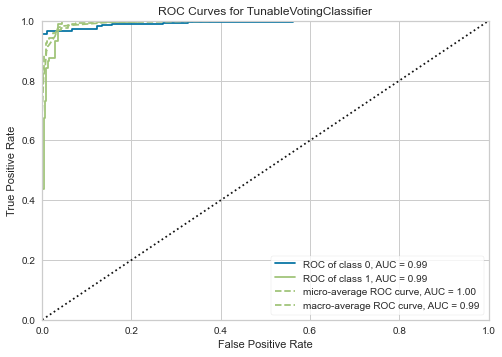

In [64]:
plot_model(combinacao_soft)

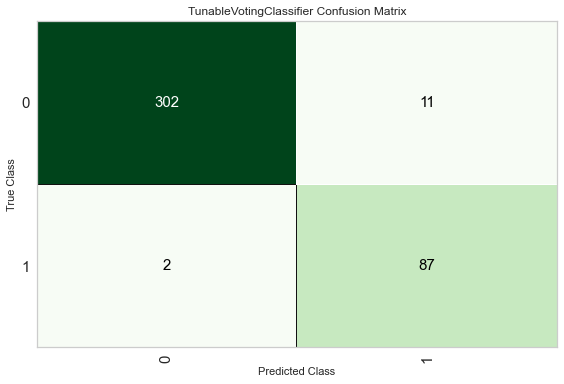

In [65]:
plot_model(combinacao_soft, plot = 'confusion_matrix')

---

In [66]:
pred = predict_model(combinacao_soft)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.9677,0.9933,0.9712,0.9700,0.9682,0.9095,0.9113


## Utilizando a função predict_proba podemos tomar os valores das probabilidades dada pelo modelo. E podemos ver que o que acontece na variável 'Score' é que a probabilidade apresentada é sempre a de pertencer a resposta classificada, por isso então a suposta incoerência nos valores observados. 

---

## Utilizando o modelo selecionado na propria base para identificar possiveis fraudadores

In [28]:
pred = predict_model(combinacao_soft, data = dados)

NameError: name 'combinacao_soft' is not defined

## Queremos selecionar aqueles em que a resposta observada é não fumante, mas que nosso modelo indica que é fumante. Vamos ordenar o resultado pelo Score, pois quanto mais alto, maior a probabilidade ser fumante e, portanto, maior o risco de ser um fraudador. 

In [68]:
possiveis_fraudes = pred[(pred['Label'] == 'yes') & (pred['smoker'] == 'no')].sort_values(by = 'Score', ascending = False)
possiveis_fraudes

,age,sex,bmi,children,smoker,region,charges,Label,Score
583,32,female,23.650,1,no,southeast,17626.23951,yes,0.8607
242,55,female,26.800,1,no,southwest,35160.13457,yes,0.8244
1206,59,female,34.800,2,no,southwest,36910.60803,yes,0.7986
140,34,male,22.420,2,no,northeast,27375.90478,yes,0.7396
159,50,female,27.830,3,no,southeast,19749.38338,yes,0.7112
143,29,male,29.735,2,no,northwest,18157.87600,yes,0.6955
1272,43,male,25.520,5,no,southeast,14478.33015,yes,0.6946
936,44,male,29.735,2,no,northeast,32108.66282,yes,0.6834
491,61,female,25.080,0,no,southeast,24513.09126,yes,0.6639
987,45,female,27.645,1,no,northwest,28340.18885,yes,0.6132


## Portanto, o conjunto de dados acima é uma lista dos possíveis fraudadores, ordenada por aqueles mais prováveis de serem de fato fraudadores. Uma instituição poderia, por exemplo, tem um patamar em que caso a probabilidade seja maior que esse patamar, então uma investigação seria realizada. Por exemplo, se esse patamar fosse 70%, os individuos a serem investigados então seriam os seguintes:

In [69]:
investigar = possiveis_fraudes[possiveis_fraudes['Score'] > 0.7]
investigar

,age,sex,bmi,children,smoker,region,charges,Label,Score
583,32,female,23.65,1,no,southeast,17626.23951,yes,0.8607
242,55,female,26.80,1,no,southwest,35160.13457,yes,0.8244
1206,59,female,34.80,2,no,southwest,36910.60803,yes,0.7986
140,34,male,22.42,2,no,northeast,27375.90478,yes,0.7396
159,50,female,27.83,3,no,southeast,19749.38338,yes,0.7112


In [70]:
modelo_final = finalize_model(combinacao_soft)

In [71]:
# Salvando o modelo
save_model(modelo_final, 'meu-melhor-modelo-para-smoker')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='smoker',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strat...
                                                                              presort='deprecated',
                                                                              random_state=4962,
                                                                             

In [33]:
# Deploy Básico

def DetectorDeFumante(age, sex, bmi, children, region, charges):
    dados0 = {'age': [age], 'sex': [sex], 'bmi': [bmi], 'children': [children], 'region': [region], 'charges': [charges]}
    dados = pd.DataFrame(dados0)

    modelo = load_model('meu-melhor-modelo-para-smoker')
 
    pred = predict_model(modelo, data = dados)
    resp = 'NÃO' if pred['Label'][0] == 'no' else 'SIM' 
    prob = pred['Score'][0] 


    print(' ')
    print('Idade: {}'.format(age))
    print('Sexo: {}'.format(sex))
    print('IMC: {}'.format(bmi))
    print('Crianças: {}'.format(children))
    print('Região: {}'.format(region))
    print('Custos: {}'.format(charges))
    print(' ')
    print('É fumante: {}, com probabilidade {:.2f}%'.format(resp, 100*prob)) 

In [35]:
DetectorDeFumante(age = 30, sex = 'male', bmi = 25, children = 0, region = 'southwest', charges = 20000)

Transformation Pipeline and Model Successfully Loaded
 
Idade: 30
Sexo: male
IMC: 25
Crianças: 0
Região: southwest
Custos: 20000
 
É fumante: SIM, com probabilidade 85.74%


In [36]:
DetectorDeFumante(age = 30, 
                  sex = 'male', 
                  bmi = 25, 
                  children = 0, 
                  region = 'southwest', 
                  charges = 20000)

Transformation Pipeline and Model Successfully Loaded
 
Idade: 30
Sexo: male
IMC: 25
Crianças: 0
Região: southwest
Custos: 20000
 
É fumante: SIM, com probabilidade 85.74%


## **Exercicio:** Utilize o PyCaret para tentar melhorar sua predição na competição do Titanic!